In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc = pd.read_csv('./stats_data/BINANCE_BTCUSDT, 1D.csv')

In [3]:
btc['time'] = pd.to_datetime(btc['time'], unit='s')
btc.set_index('time', inplace=True)

In [4]:
btc['log_ret'] = np.log(btc['close'] / btc['close'].shift(1))

Text(0.5, 1.0, 'Log Return')

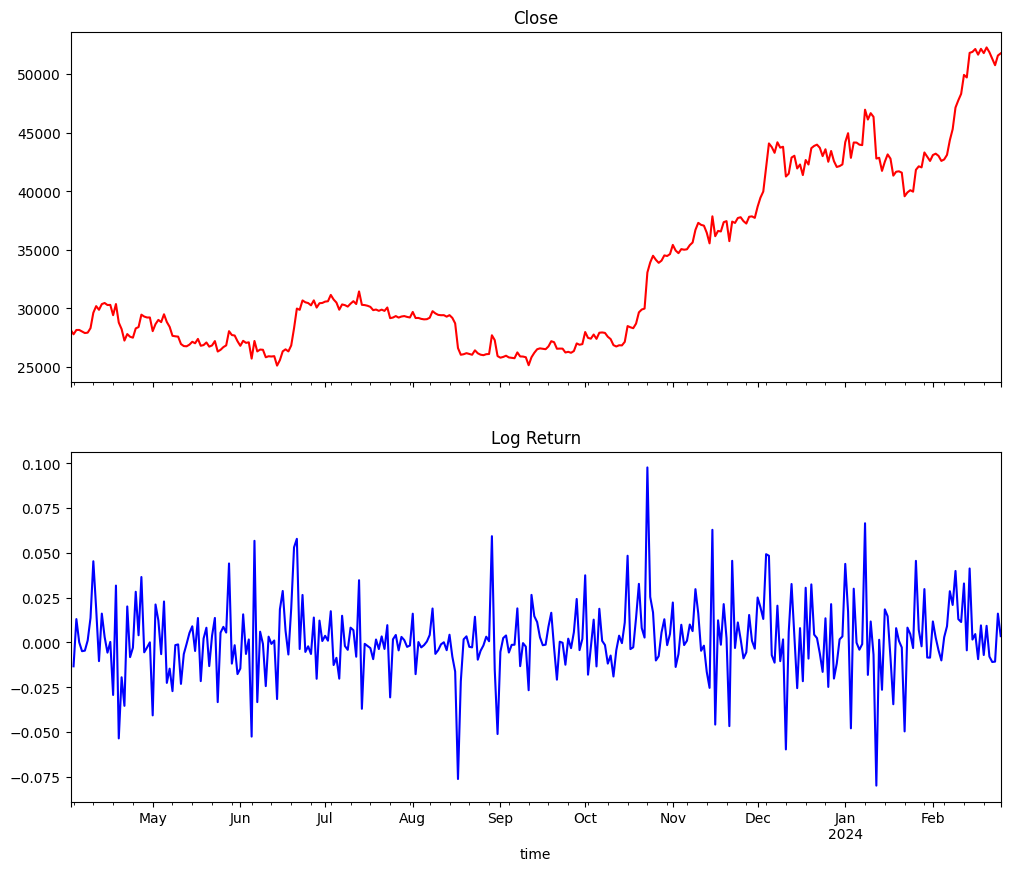

In [5]:
fig, axs = plt.subplots(2, sharex=True, figsize=(12, 10))

# Plot PnLs
btc['close'].plot(ax=axs[0], color='red', kind='line')
axs[0].set_title('Close')

# Plot PnLs
btc['log_ret'].plot(ax=axs[1], color='blue', kind='line')
axs[1].set_title('Log Return')


In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
# ADF Test (Close)
print(f'============== Close ===============')
result = adfuller(btc['close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

============== Close ===============
ADF Statistic: 0.6955692355322092
n_lags: 0.9897490300866356
p-value: 0.9897490300866356
Critial Values:
   1%, -3.4503836022181056
Critial Values:
   5%, -2.8703653471616826
Critial Values:
   10%, -2.571471939191249


In [8]:
# ADF Test (Log Return)
result = adfuller(btc['log_ret'].dropna(), autolag='AIC')
print(f'============== log_ret ===============')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

============== log_ret ===============
ADF Statistic: -19.321209336816366
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4504451681828194
Critial Values:
   5%, -2.870392380216117
Critial Values:
   10%, -2.571486353732897
